In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
norm_data = pd.read_csv('merged_norm.csv', header = None)

C:\Users\guido\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (1,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,25

In [132]:
# some numbers are stored as strings, this converts them to numbers
def str_to_float(L):
    return [float(ele) for ele in L]

def str_to_int(L):
    return [int(ele) for ele in L]



1.0


In [154]:
from sklearn.model_selection import train_test_split
# extract target values
genres = np.asarray(norm_data[:][3])

# convert genres to numbers for kNN
dict_genres = {'Hip-Hop': 0, 'Pop': 1, 'Folk': 2, 'Experimental': 3, 'Rock':4, 'International':5, 'Electronic':6, 'Instrumental':7}
genres = np.asarray([dict_genres[genre] for genre in genres])
num_features = len(genres)

# extract features and convert them as an array of numbers
all_features = np.asarray(norm_data)
str_features = all_features[:, 4:]
features = np.asarray([str_to_float(feature) for feature in str_features])

print(features.shape)

(7989, 516)


In [155]:
# this function normzalizes every column of an nd array
def normalize(array):
    norm_array = []
    for i in range(len(array[0])):
        max_value = max(array[:, i])
        norm_row = []
        for j in range(len(array)):
            norm_row.append(array[j][i]/max_value)
        norm_array.append(norm_row)
        
    return np.asarray(norm_array).transpose()

features = normalize(features)


In [158]:
print(type(features))

<class 'numpy.ndarray'>


In [160]:
from sklearn.model_selection import train_test_split
# split into training and test
feat_training, feat_test, genre_training, genre_test = train_test_split(features, genres, test_size=0.1)

# split into training and validation
feat_train, feat_val, genre_train, genre_val  = train_test_split(feat_training, genre_training, test_size = 0.5)

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def k_neighbours(x_train, x_test, y_train, y_test, k):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    y_predicted = knn.predict(x_test)
    return accuracy_score(y_test, y_predicted)

accuracies = [k_neighbours(feat_train, feat_val, genre_train, genre_val, i) for i in range(1, 20)]
k = [k for k in range(1, 20)]



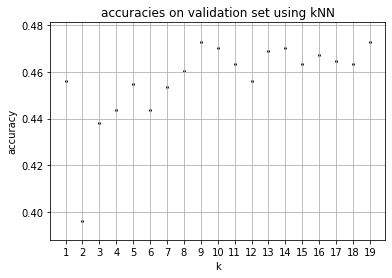

In [159]:
plt.scatter(k, accuracies, alpha = 1, s = 3, color = 'black')
plt.grid()
plt.xticks(k)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('accuracies on validation set using kNN')
plt.show()

0.3879849812265332
